<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 7.1.2: Random Forests

INSTRUCTIONS:

- Read the guides and hints, then create the necessary analysis and code for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.7419
    - **ROC AUC**  = 0.6150
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to identify the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ than **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory and iterative process. It is part of the process to repeat, review and change when finding a dead-end.

## Scenario:  Predicting whether somebody donated blood in a given month
Blood donations are important in the medical field for a range of reasons, such as assisting patients undergoing surgery, improving the quality of a patient's bloodstream,
managing serious injury/illness or even medical research.

There is a dataset that collects information about how many times a donor donated blood, how much they donated and when they last donated.

Data is courtesy of **Yeh, I-Cheng** via the **UCI Machine Learning** repository:
- Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008, doi:10.1016/j.eswa.2008.07.018.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.


Answer:

Subject Matter - Blood Donation  

Potential Questions
1. Will a person donate blood this month?
2. Cluster the data to see commonalities between people more frequently donating blood than others
3. Will a person which donated blood before, potentially donate blood again?



# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh
        Department of Information Management
        Chung-Hua University,
        Hsin Chu, Taiwan 30067, R.O.C.

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper:

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/about) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

In [374]:
# Find the dataset described above
# Hint: search for it through the UCI Machine Learning Repository

In [375]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [376]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
blood_transfusion_service_center = fetch_ucirepo(id=176) 
  
# data (as pandas dataframes) 
X = blood_transfusion_service_center.data.features 
y = blood_transfusion_service_center.data.targets 
  
# metadata 
print(blood_transfusion_service_center.metadata) 
  
# variable information 
print(blood_transfusion_service_center.variables) 

{'uci_id': 176, 'name': 'Blood Transfusion Service Center', 'repository_url': 'https://archive.ics.uci.edu/dataset/176/blood+transfusion+service+center', 'data_url': 'https://archive.ics.uci.edu/static/public/176/data.csv', 'abstract': 'Data taken from the Blood Transfusion Service Center in Hsin-Chu City in Taiwan -- this is a classification problem. ', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 748, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Donated_Blood'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Sat Mar 16 2024', 'dataset_doi': '10.24432/C5GS39', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'ID': 434, 'type': 'NATIVE', 'title': 'Knowledge discovery on RFM model using Bernoulli sequence', 'authors': 'I. Yeh, K. Yang, Tao-Ming Ting', 'venue': 'Expert systems with applications', 'year': 2009, 'journa

# Step 3: Read the Data
- Read the data (transfusion.data)
- Perform some basic structural cleaning to facilitate the work

In [378]:
# Import libraries

In [379]:
import numpy as np
import pandas as pd

# %matplotlib inline
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score

import seaborn as sns
import warnings

sns.set(style='ticks', font_scale=1.4)
warnings.filterwarnings('ignore')

In [380]:
# Read data in pandas

# Check data has loaded correctly

In [381]:
df = pd.read_csv('/Users/francescafelizardo/Documents/Francesca/IOD - UTS - Data Analytics and AI Program/Modules/DATA/transfusion.data')
df

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or spurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent the absence of data)

In [383]:
# Perform EDA by investigating each of the points above

In [384]:
df.shape

(748, 5)

In [385]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB
None


In [386]:
print(df.dtypes)

Recency (months)                              int64
Frequency (times)                             int64
Monetary (c.c. blood)                         int64
Time (months)                                 int64
whether he/she donated blood in March 2007    int64
dtype: object


In [387]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency (months),748.0,9.506684,8.095396,0.0,2.75,7.0,14.0,74.0
Frequency (times),748.0,5.514706,5.839307,1.0,2.00,4.0,7.0,50.0
Monetary (c.c. blood),748.0,1378.676471,1459.826781,250.0,500.00,1000.0,1750.0,12500.0
Time (months),748.0,34.282086,24.376714,2.0,16.00,28.0,50.0,98.0
whether he/she donated blood in March 2007,748.0,0.237968,0.426124,0.0,0.00,0.0,0.0,1.0


In [388]:
df.columns = ['Recency', 'Frequency', 'Monetary',
              'Time', 'Donated_Mar_2007']
df

,Recency,Frequency,Monetary,Time,Donated_Mar_2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [389]:
outliers = {}

# Loop through numeric features and detect outliers using IQR
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outlier_rows = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    outliers[col] = outlier_rows

for col, rows in outliers.items():
    print(f"\nOutliers in '{col}': {len(rows)} rows")
    print(rows[[col]])



Outliers in 'Recency': 7 rows
     Recency
495       35
496       38
497       38
498       40
499       74
746       39
747       72

Outliers in 'Frequency': 45 rows
     Frequency
0           50
2           16
3           20
4           24
9           46
10          23
17          15
34          16
44          20
55          19
58          16
65          16
72          17
96          17
105         17
115         24
188         15
241         22
243         17
278         18
280         16
320         16
327         16
341         38
359         16
366         15
500         43
501         22
502         34
503         44
504         26
505         41
506         21
508         21
514         16
517         33
527         15
528         24
542         16
562         16
633         15
635         16
655         16
672         15
677         19

Outliers in 'Monetary': 45 rows
     Monetary
0       12500
2        4000
3        5000
4        6000
9       11500
10       5750
17       3

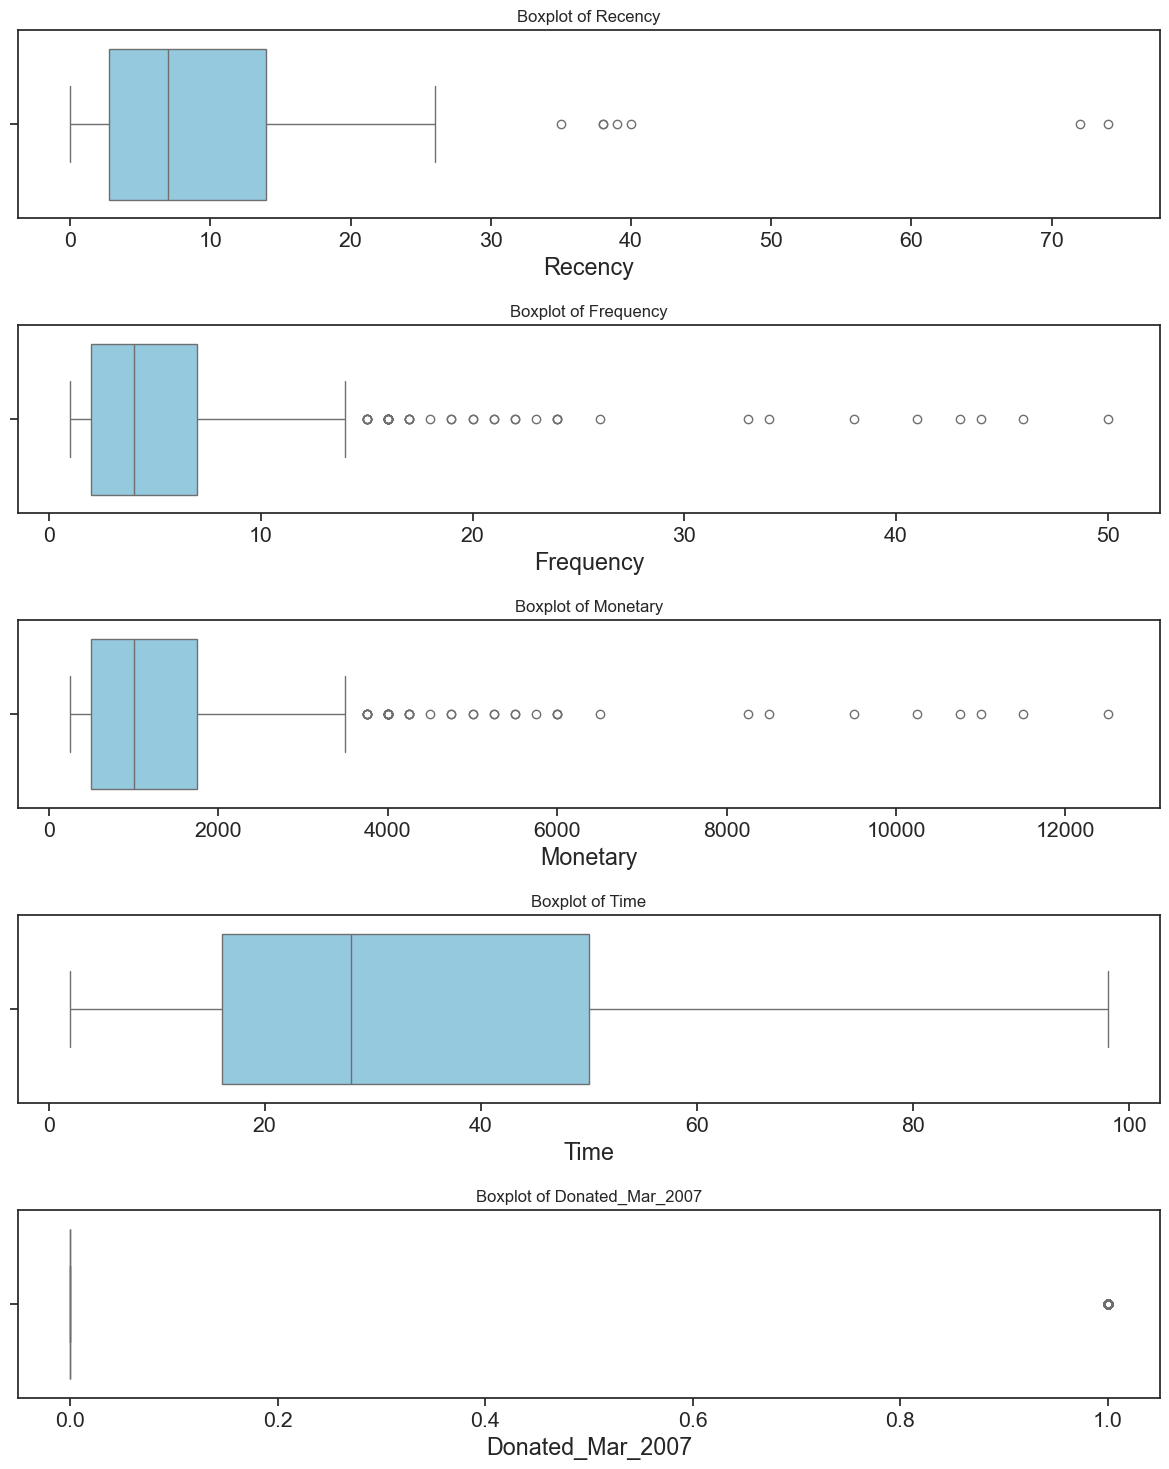

In [390]:
plt.figure(figsize=(12, len(df.columns) * 3))

for i, col in enumerate(df.columns, 1):
    plt.subplot(len(df.columns), 1, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.tight_layout()

plt.show()

In [391]:
df.isnull().sum()

Recency             0
Frequency           0
Monetary            0
Time                0
Donated_Mar_2007    0
dtype: int64

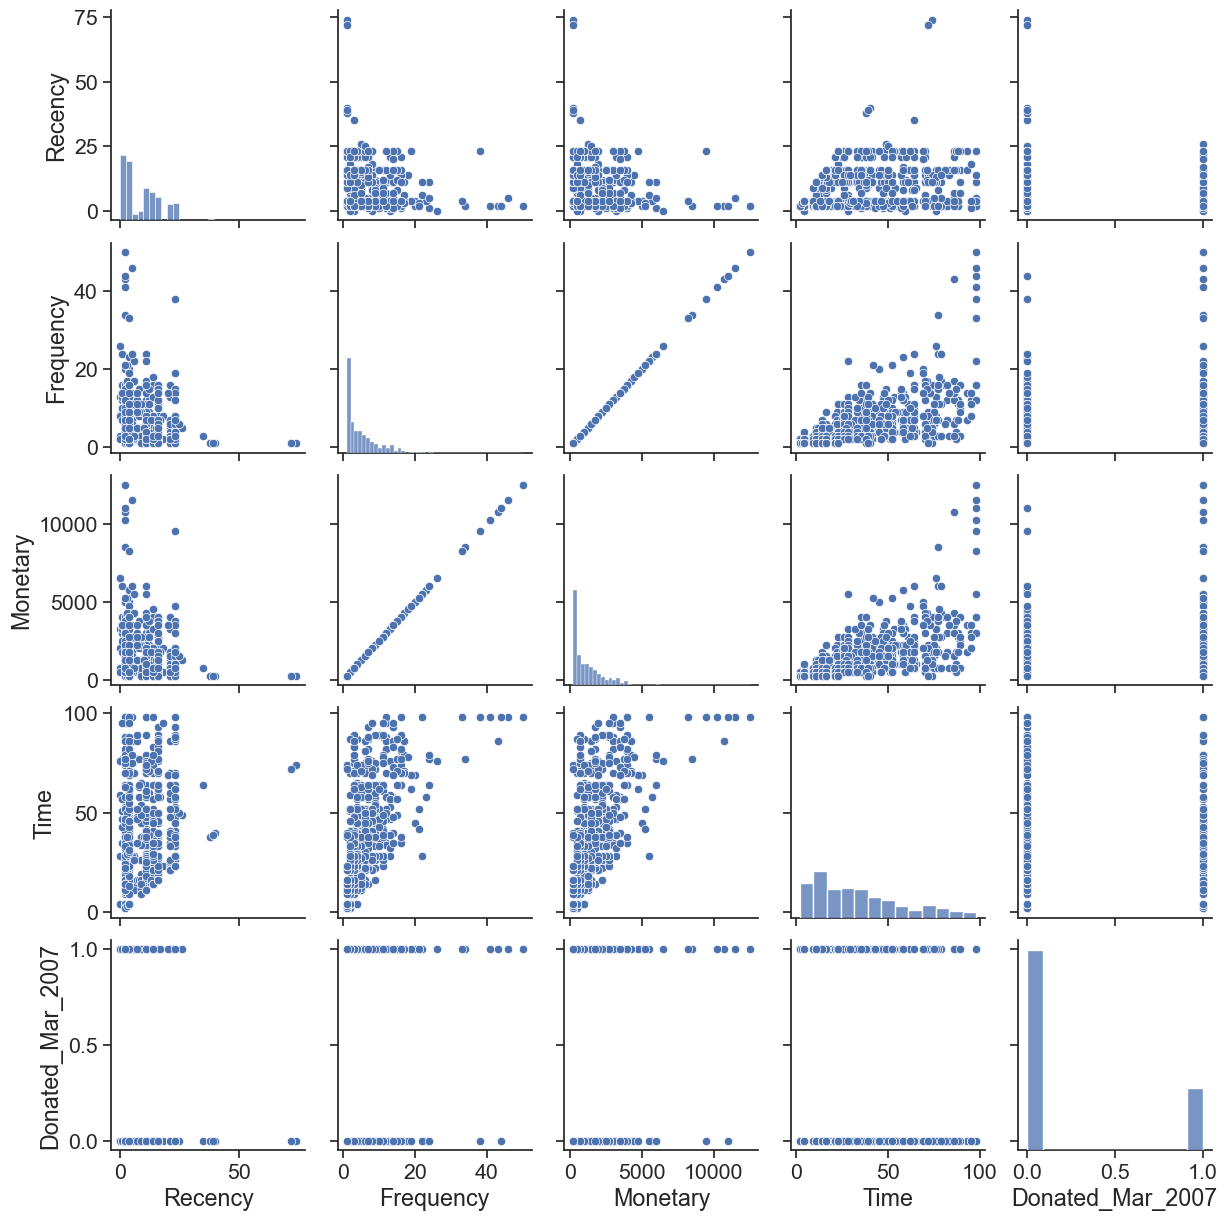

In [392]:
sns.pairplot(df)
plt.show()

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Feature Engineer** (if useful or necessary)

In [394]:
# Filter/subset/clean the data according to your EDA findings

Answer:

Outliers - there are outliers for each feature but model to be used is random forest which is robust to outliers  
Null - no null values  
Missing values - no missing values 
Coded Content - not relevant  
Feature Engineering - not necessary as random forest can potentially handle irrelevant features

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary)
    - [ ] Classification (multi-class)
    - [ ] Clustering

Answer:

What are the input variables (features)? - Recency, Frequency, Monetary,Time  
Is there an output variable (label)? Yes - Donated_Mar_2007  
If there is an output variable: Yes  
What is it? - Donated_Mar_2007  
What is its type? - Numeric binary integer  
What type of Modelling is it? - Supervised  
What type of Modelling is it? -  Classification (binary)  

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when splitting

In [399]:
# Split your data

In [400]:
df['Donated_Mar_2007'].value_counts() #shows imbalance in classes

Donated_Mar_2007
0    570
1    178
Name: count, dtype: int64

In [401]:
0.8*748

598.4

In [402]:
features = ['Recency', 'Frequency', 'Monetary', 'Time']
outcome = 'Donated_Mar_2007'

X = df[features].copy()
y = df[outcome].astype(str).copy()

In [403]:
test_size = X.shape[0] - 590

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=test_size,
    random_state=5,
    stratify=y)

# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [405]:
# Choose a model or models

In [406]:
model = RandomForestClassifier(
    n_estimators=100,           # Number of trees in the forest (standard default)
    max_depth=4,                # Limit tree depth to prevent overfitting
    min_samples_split=10,       # Require 10+ samples to split a node
    min_samples_leaf=5,         # At least 5 samples in each leaf
    max_features='sqrt',        # Use sqrt(n_features) at each split (default for classifier)
    class_weight='balanced',    # Handle class imbalance
    random_state=42,            # Reproducibility
    n_jobs=-1                   # Use all CPU cores to speed up training
)


# Step 9: Fit the Model

In [408]:
# Fit model
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=4, min_samples_leaf=5,
                       min_samples_split=10, n_jobs=-1, random_state=42)

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [410]:
# Evaluate model against training set

In [411]:
y_train_pred = model.predict(X_train)
y_train_prob = model.predict_proba(X_train)[:, 1] 

In [412]:
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Training Precision:", precision_score(y_train, y_train_pred,pos_label='1'))
print("Training Recall:", recall_score(y_train, y_train_pred,pos_label='1'))
print("Training F1 Score:", f1_score(y_train, y_train_pred,pos_label='1'))
print("Training ROC AUC:", roc_auc_score(y_train, y_train_prob,))

Training Accuracy: 0.7694915254237288
Training Precision: 0.5108695652173914
Training Recall: 0.6714285714285714
Training F1 Score: 0.5802469135802469
Training ROC AUC: 0.8242777777777778


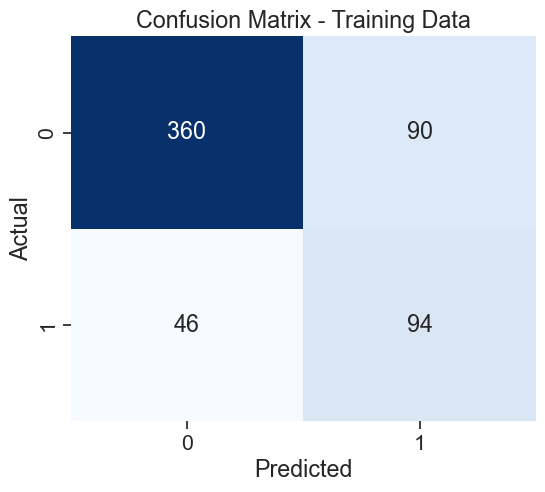

In [413]:
cm = confusion_matrix(y_train, y_train_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Training Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

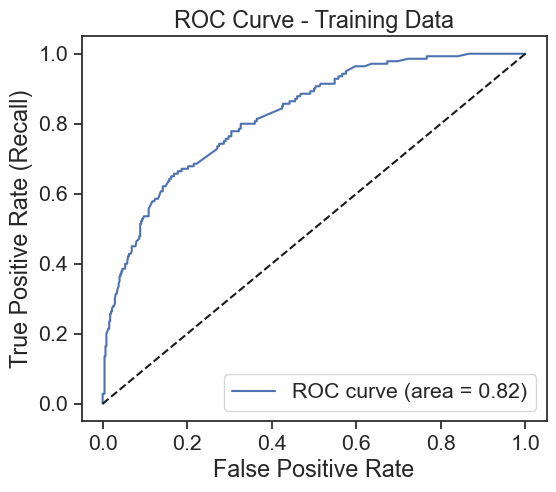

In [414]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_prob,pos_label='1')
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_score(y_train, y_train_prob):.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - Training Data')
plt.legend(loc='lower right')
plt.show()

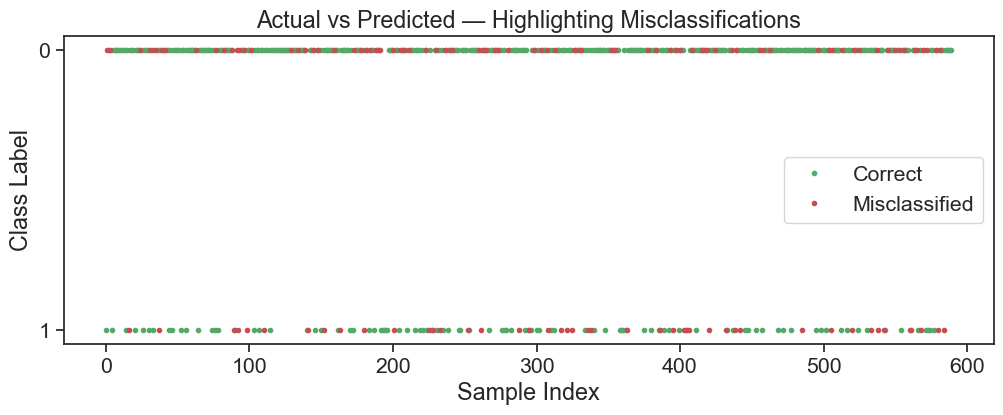

In [415]:
misclassified = y_train != y_train_pred
plt.figure(figsize=(12,4))
plt.plot(np.where(~misclassified)[0], y_train[~misclassified], 'g.', label='Correct')
plt.plot(np.where(misclassified)[0], y_train[misclassified], 'r.', label='Misclassified')
plt.yticks([0,1])
plt.title("Actual vs Predicted — Highlighting Misclassifications")
plt.xlabel("Sample Index")
plt.ylabel("Class Label")
plt.legend()
plt.show()


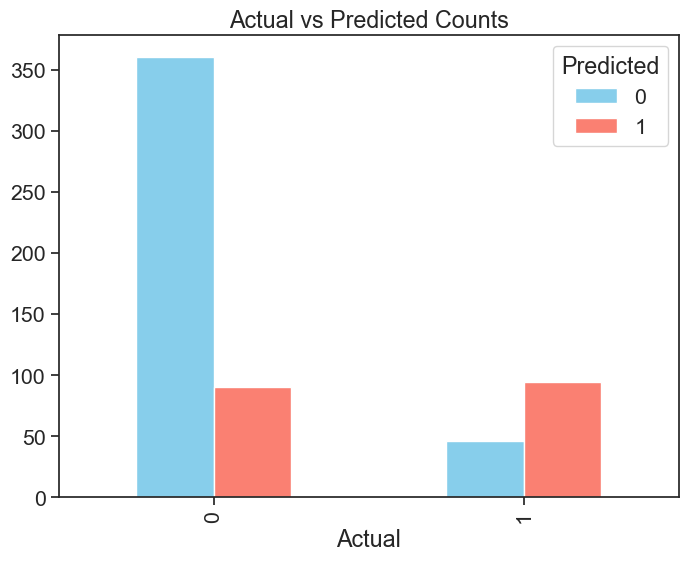

In [416]:
df_compare = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})

counts = pd.crosstab(df_compare['Actual'], df_compare['Predicted'], rownames=['Actual'], colnames=['Predicted'])

counts.plot(kind='bar', figsize=(8,6), color=['skyblue', 'salmon'])
plt.title("Actual vs Predicted Counts")
plt.show()


# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [418]:
# Evaluate model against test set

Test Accuracy: 0.689873417721519
Test Precision: 0.4098360655737705
Test Recall: 0.6578947368421053
Test F1 Score: 0.5050505050505051
Test ROC AUC: 0.7341008771929826


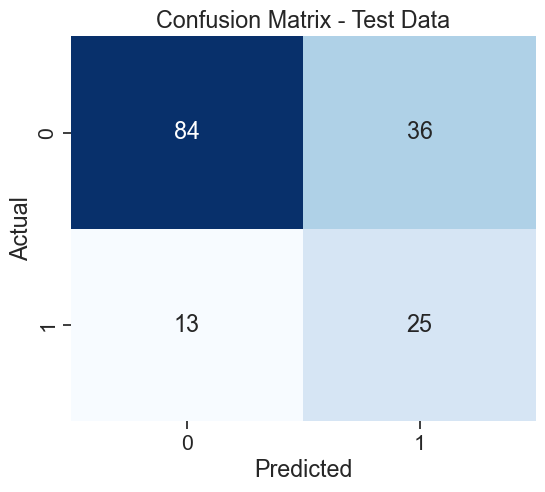

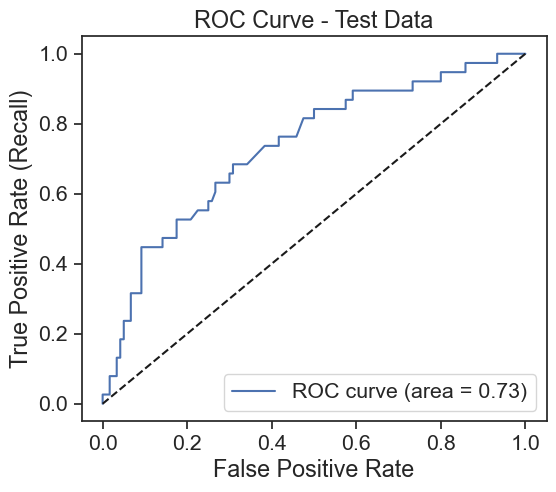

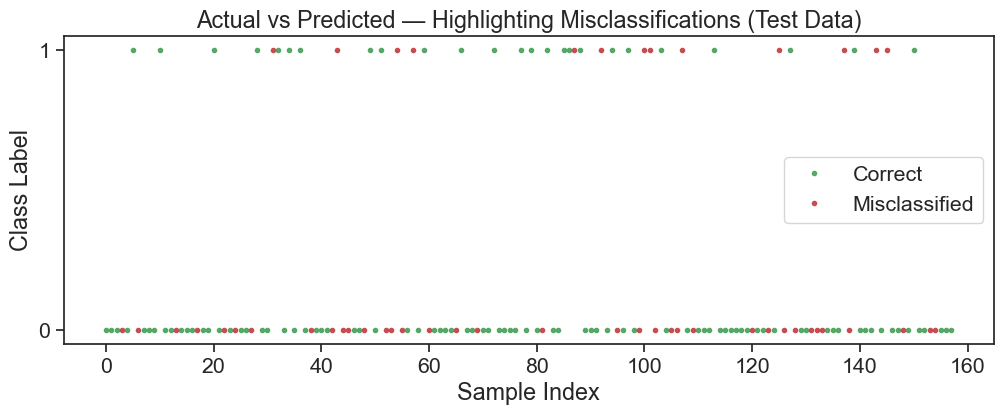

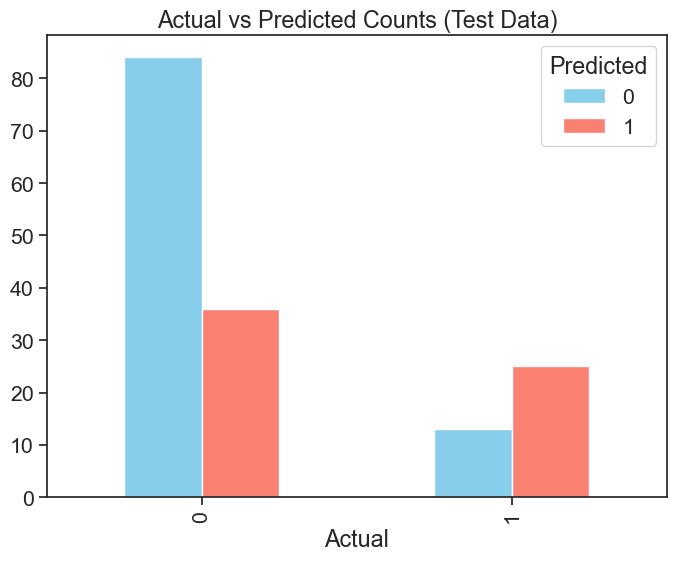

In [419]:
# 1. Predict on test data
y_test_pred = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for positive class

# 2. Print metrics
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Precision:", precision_score(y_test, y_test_pred, pos_label='1'))
print("Test Recall:", recall_score(y_test, y_test_pred, pos_label='1'))
print("Test F1 Score:", f1_score(y_test, y_test_pred, pos_label='1'))
print("Test ROC AUC:", roc_auc_score(y_test, y_test_prob))

# 3. Confusion Matrix heatmap
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 4. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob, pos_label='1')
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_score(y_test, y_test_prob):.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - Test Data')
plt.legend(loc='lower right')
plt.show()

# 5. Misclassification plot
misclassified = y_test != y_test_pred
plt.figure(figsize=(12,4))
plt.plot(np.where(~misclassified)[0], y_test[~misclassified], 'g.', label='Correct')
plt.plot(np.where(misclassified)[0], y_test[misclassified], 'r.', label='Misclassified')
plt.yticks([0,1])
plt.title("Actual vs Predicted — Highlighting Misclassifications (Test Data)")
plt.xlabel("Sample Index")
plt.ylabel("Class Label")
plt.legend()
plt.show()

# 6. Actual vs Predicted counts bar chart
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
counts = pd.crosstab(df_compare['Actual'], df_compare['Predicted'], rownames=['Actual'], colnames=['Predicted'])
counts.plot(kind='bar', figsize=(8,6), color=['skyblue', 'salmon'])
plt.title("Actual vs Predicted Counts (Test Data)")
plt.show()


# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

The model can be used to predict if a person makes a blood donation in Mar 2007. 

>

>

>



---



---



> > > > > > > > > © 2025 Institute of Data


---



---



